In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [4]:
# READ THE DATASET
data = pd.read_csv(
    "IMDb Movies India.csv", encoding="latin"
)
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# DATA ANALYSIS & PREPROCESSING
data.shape


(15509, 10)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.describe(include=["float64", "object"])


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
# CHECKING DUPLICATE VALUES
data.duplicated().sum()


np.int64(6)

In [10]:
data.drop_duplicates(inplace=True)


In [11]:
data.duplicated().sum()


np.int64(0)

In [12]:
# CHANGING ["Duration","Year","Votes"] TO NUMERIC TYPE
data["Year"].unique()


array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [13]:
data["Duration"].unique()


array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [14]:
data["Votes"].unique()


array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [15]:
data["Duration"] = data["Duration"].str.replace(" min", "").astype(float)
data["Duration"].head()


0      NaN
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64

In [16]:
data["Year"] = data["Year"].str.strip("()").astype(float)
data["Year"].head()


0       NaN
1    2019.0
2    2021.0
3    2019.0
4    2010.0
Name: Year, dtype: float64

In [17]:
data["Votes"] = data["Votes"].str.replace(",", "")


In [18]:
data["Votes"] = data["Votes"].str.replace("$5.16M", "516", regex=False)


In [19]:
data["Votes"] = data["Votes"].astype(float)
data["Votes"].head()


0     NaN
1     8.0
2     NaN
3    35.0
4     NaN
Name: Votes, dtype: float64

In [20]:
# HANDLING MISSING VALUES
data["Duration"].fillna(data["Duration"].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10984\3368898749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Duration"].fillna(data["Duration"].median(), inplace=True)


In [21]:
data["Rating"].fillna(data["Rating"].mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10984\1150112762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Rating"].fillna(data["Rating"].mean(), inplace=True)


In [22]:
data["Votes"].fillna(data["Votes"].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10984\2308321509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Votes"].fillna(data["Votes"].median(), inplace=True)


In [23]:
data.dropna(
    subset=["Genre", "Actor 1", "Year", "Director", "Actor 2", "Actor 3"], inplace=True
)


In [24]:
data.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [25]:
data.shape


(11085, 10)

In [26]:
data.nunique()


Name        10178
Year           94
Duration      178
Genre         448
Rating         85
Votes        2031
Director     4530
Actor 1      3764
Actor 2      4175
Actor 3      4398
dtype: int64

In [27]:
data["Genre"] = data["Genre"].str.split(",").explode("Genre").reset_index(drop=True)


In [28]:
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Musical,5.841621,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Comedy,4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Romance,5.841621,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [29]:
data.sort_values(by="Rating", ascending=False, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10984\3494285316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


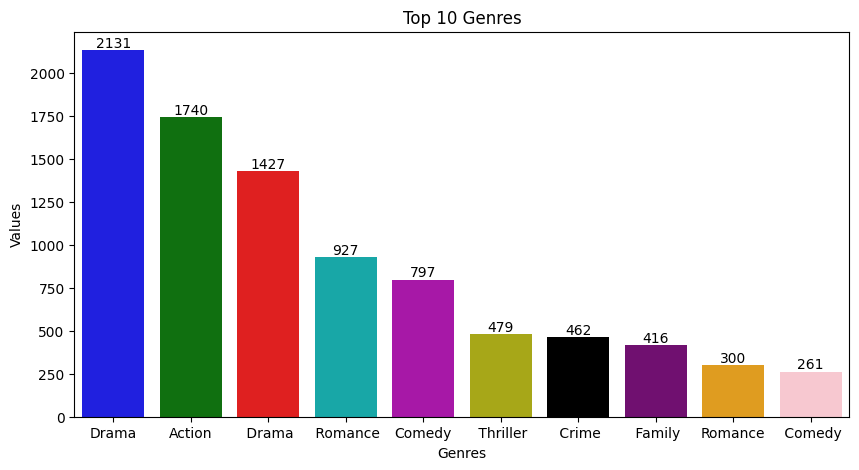

In [30]:
top10_genres = data["Genre"].value_counts().head(10)
plt.figure(figsize=(10, 5))
# Define a list of colors
colors = ["b", "g", "r", "c", "m", "y", "k", "purple", "orange", "pink"]
bar = sns.barplot(
    x=top10_genres.index,
    y=top10_genres.values,
    palette=colors,
)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
bar.bar_label(bar.containers[2])
bar.bar_label(bar.containers[3])
bar.bar_label(bar.containers[4])
bar.bar_label(bar.containers[5])
bar.bar_label(bar.containers[6])
bar.bar_label(bar.containers[7])
bar.bar_label(bar.containers[8])
bar.bar_label(bar.containers[9])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10984\924459122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(


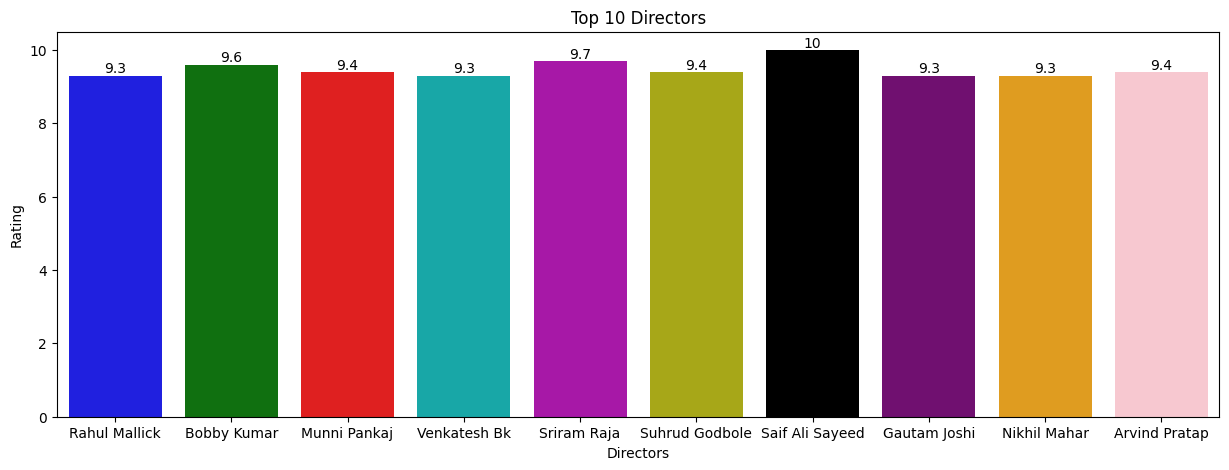

In [31]:
top10_directors = data["Director"].head(10)
plt.figure(figsize=(15, 5))
bar1 = sns.barplot(
    x=top10_directors,
    y=data["Rating"],
    palette=colors,
)
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])
bar1.bar_label(bar1.containers[2])
bar1.bar_label(bar1.containers[3])
bar1.bar_label(bar1.containers[4])
bar1.bar_label(bar1.containers[5])
bar1.bar_label(bar1.containers[6])
bar1.bar_label(bar1.containers[7])
bar1.bar_label(bar1.containers[8])
bar1.bar_label(bar1.containers[9])
plt.xlabel("Directors")
plt.ylabel("Rating")
plt.title("Top 10 Directors")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10984\2152612420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(


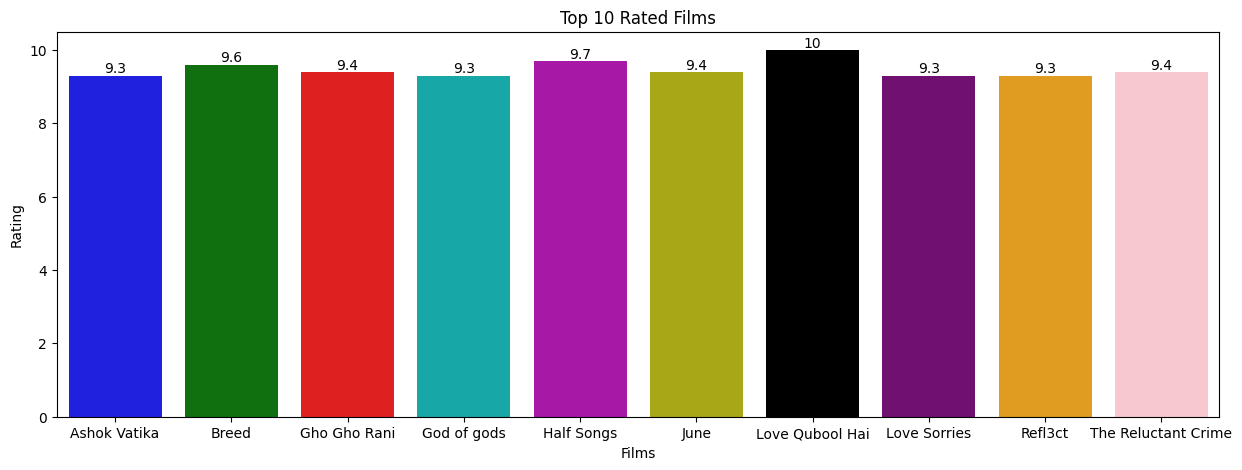

In [32]:
top10_rated_films = data["Name"].head(10)
plt.figure(figsize=(15, 5))
bar2 = sns.barplot(
    x=top10_rated_films,
    y=data["Rating"],
    palette=colors,
)
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])
bar2.bar_label(bar2.containers[2])
bar2.bar_label(bar2.containers[3])
bar2.bar_label(bar2.containers[4])
bar2.bar_label(bar2.containers[5])
bar2.bar_label(bar2.containers[6])
bar2.bar_label(bar2.containers[7])
bar2.bar_label(bar2.containers[8])
bar2.bar_label(bar2.containers[9])
plt.xlabel("Films")
plt.ylabel("Rating")
plt.title("Top 10 Rated Films")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10984\1860011578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar3 = sns.barplot(x=top10_popular_films, y=data["Votes"], palette=colors)


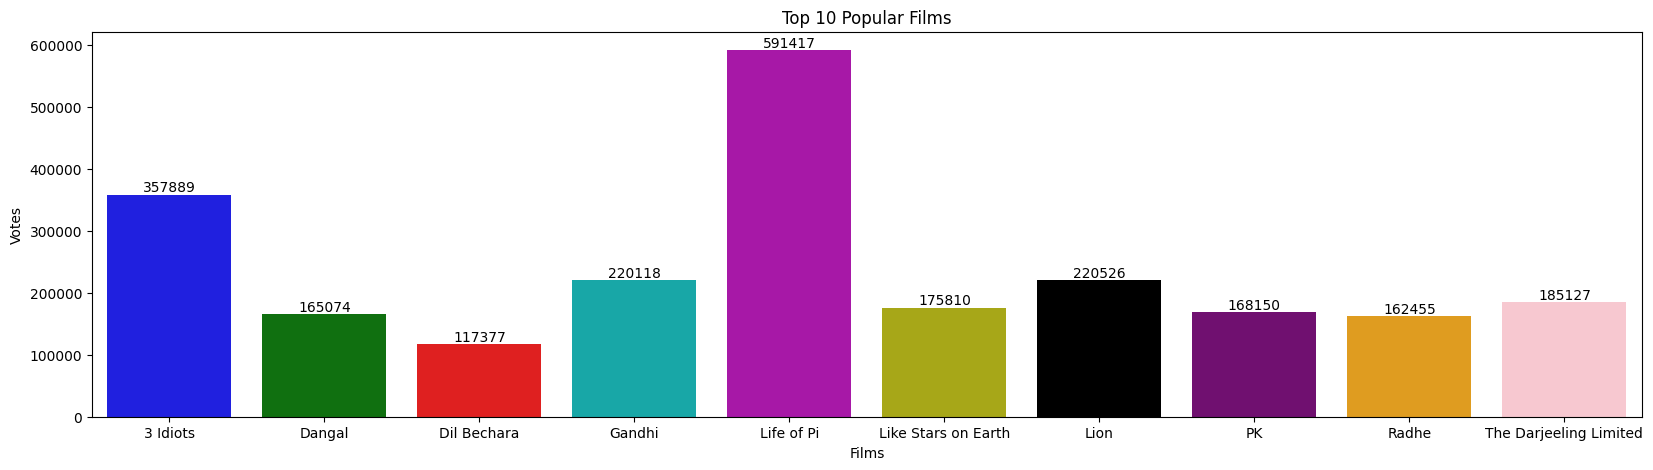

In [33]:
data.sort_values(by="Votes", ascending=False, inplace=True)
top10_popular_films = data["Name"].head(10)
plt.figure(figsize=(20, 5))
bar3 = sns.barplot(x=top10_popular_films, y=data["Votes"], palette=colors)
bar3.bar_label(bar3.containers[0])
bar3.bar_label(bar3.containers[1])
bar3.bar_label(bar3.containers[2])
bar3.bar_label(bar3.containers[3])
bar3.bar_label(bar3.containers[4])
bar3.bar_label(bar3.containers[5])
bar3.bar_label(bar3.containers[6])
bar3.bar_label(bar3.containers[7])
bar3.bar_label(bar3.containers[8])
bar3.bar_label(bar3.containers[9])
plt.xlabel("Films")
plt.ylabel("Votes")
plt.title("Top 10 Popular Films")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_10984\1393887165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar4 = sns.barplot(


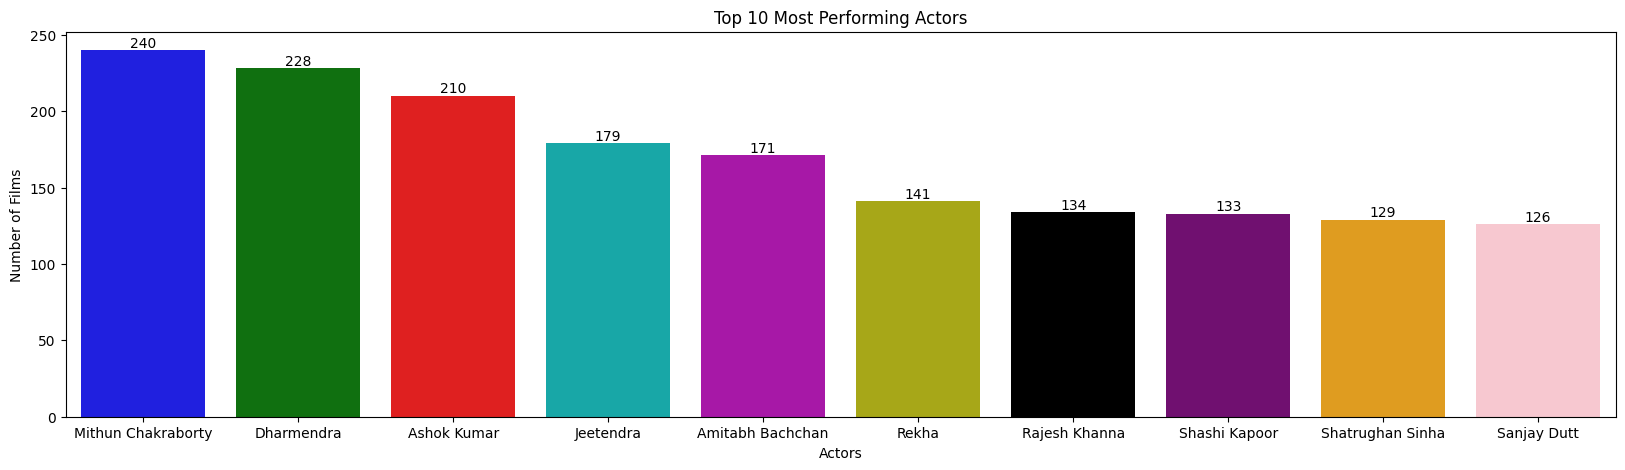

In [34]:
actors = pd.concat([data["Actor 1"], data["Actor 2"], data["Actor 3"]])
film_count = actors.value_counts()
top10_most_performing_actors = film_count.head(10)
plt.figure(figsize=(20, 5))
bar4 = sns.barplot(
    x=top10_most_performing_actors.index,
    y=top10_most_performing_actors.values,
    palette=colors,
)
bar4.bar_label(bar4.containers[0])
bar4.bar_label(bar4.containers[1])
bar4.bar_label(bar4.containers[2])
bar4.bar_label(bar4.containers[3])
bar4.bar_label(bar4.containers[4])
bar4.bar_label(bar4.containers[5])
bar4.bar_label(bar4.containers[6])
bar4.bar_label(bar4.containers[7])
bar4.bar_label(bar4.containers[8])
bar4.bar_label(bar4.containers[9])
plt.xlabel("Actors")
plt.ylabel("Number of Films")
plt.title("Top 10 Most Performing Actors")
plt.show()


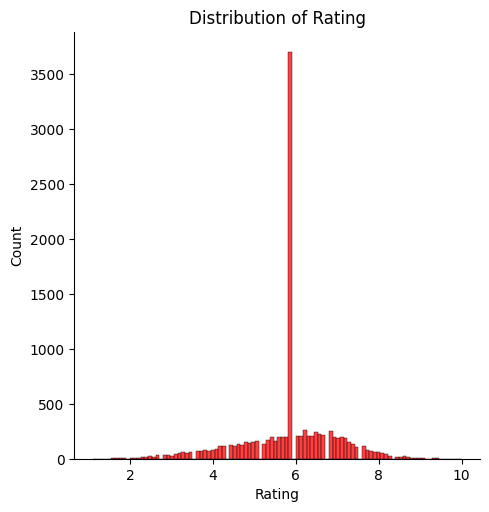

In [35]:
sns.displot(x=data["Rating"], color="red")
plt.title("Distribution of Rating")
plt.show()


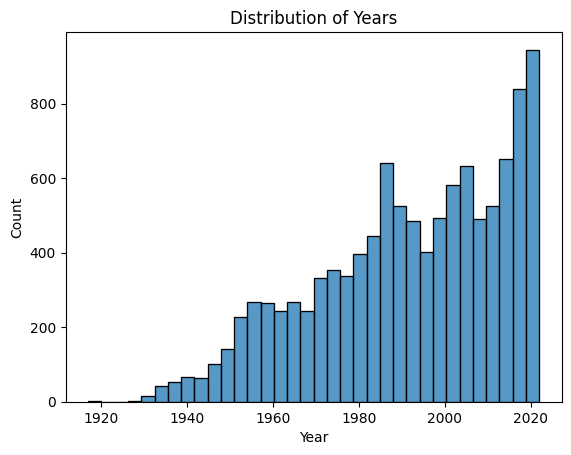

In [36]:
sns.histplot(x=data["Year"])
plt.title("Distribution of Years")
plt.show()


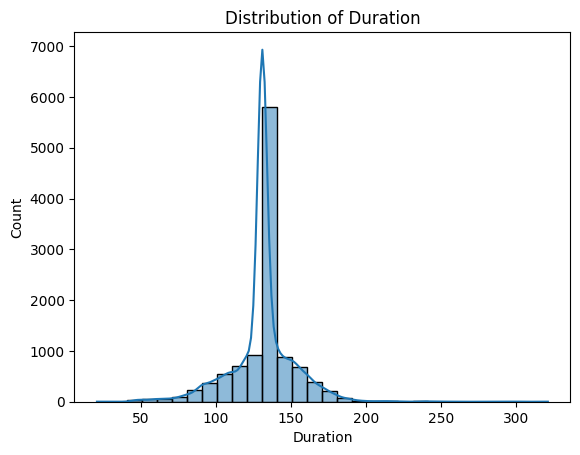

In [37]:
sns.histplot(x=data["Duration"], kde=True, bins=30)
plt.title("Distribution of Duration")
plt.show()


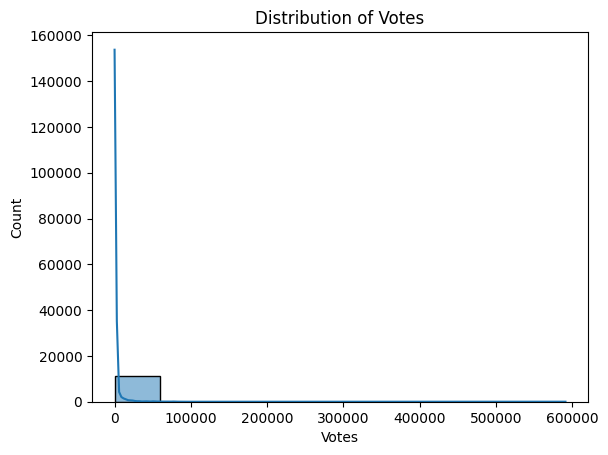

In [38]:
sns.histplot(x=data["Votes"], kde=True, bins=10)
plt.title("Distribution of Votes")
plt.show()


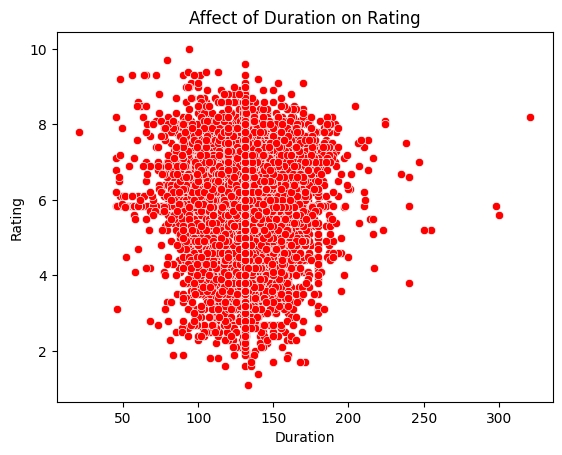

In [39]:
sns.scatterplot(x=data["Duration"], y=data["Rating"], color="red")
plt.title("Affect of Duration on Rating")
plt.show()


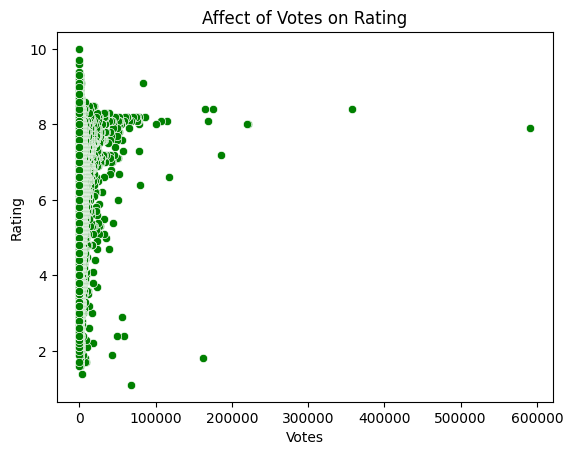

In [40]:
sns.scatterplot(x=data["Votes"], y=data["Rating"], color="g")
plt.title("Affect of Votes on Rating")
plt.show()


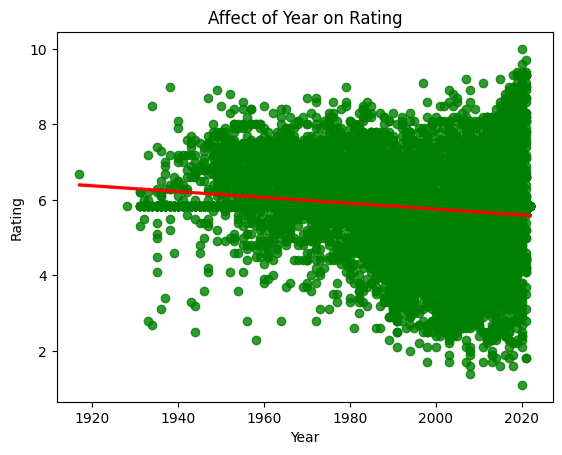

In [41]:
sns.regplot(
    x=data["Year"],
    y=data["Rating"],
    line_kws=dict(color="r"),
    scatter_kws=dict(color="green"),
)
plt.title("Affect of Year on Rating")
plt.show()


In [42]:
# TARGET ENCODING
data["Genre"]=data.groupby("Genre")["Rating"].transform("mean")
data["Director"]=data.groupby("Director")["Rating"].transform("mean")
data["Actor 1"]=data.groupby("Actor 1")["Rating"].transform("mean")
data["Actor 2"]=data.groupby("Actor 2")["Rating"].transform("mean")
data["Actor 3"]=data.groupby("Actor 3")["Rating"].transform("mean")
data["Name"]=data.groupby("Name")["Rating"].transform("mean")


In [43]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,7.9,2012.0,127.0,5.735424,7.9,591417.0,7.90,7.900000,5.873037,7.525000
75,8.4,2009.0,170.0,5.856723,8.4,357889.0,8.06,6.827273,6.257143,8.400000
8233,8.0,2016.0,118.0,5.839962,8.0,220526.0,8.00,7.800000,8.000000,8.000000
4848,8.0,1982.0,191.0,5.874443,8.0,220118.0,8.00,8.000000,8.000000,6.450811
14038,7.2,2007.0,91.0,5.814853,7.2,185127.0,7.20,5.650000,7.200000,7.200000


In [44]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 8219 to 8339
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  float64
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     11085 non-null  float64
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  float64
 7   Actor 1   11085 non-null  float64
 8   Actor 2   11085 non-null  float64
 9   Actor 3   11085 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


In [45]:
# FEATURE ENGINEERING
features=data.drop("Rating",axis=1)
target=data["Rating"]


C:\Users\user\AppData\Local\Temp\ipykernel_10984\3640266253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x="Feature", y="Values", data=df, palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_10984\3640266253.py:8: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  bar2 = sns.barplot(x="Feature", y="Values", data=df, palette=colors)


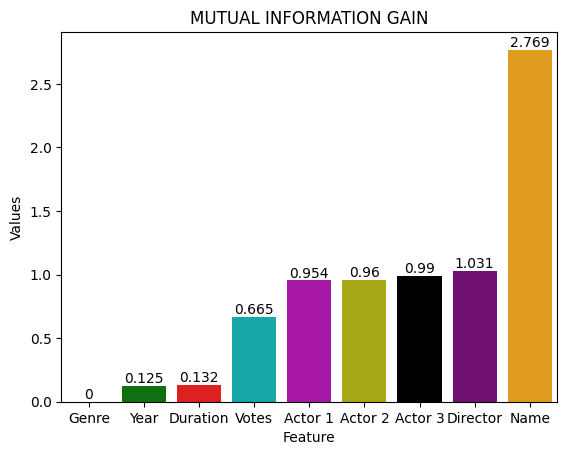

In [48]:
# MUTUAL INFORMATION GAIN
values = mutual_info_regression(features, target)
mutual_info = pd.Series(values)
mutual_info.index = features.columns
df = pd.DataFrame({"Feature": mutual_info.index, "Values": mutual_info})
df.sort_values(ascending=True, by="Values", inplace=True)
df["Values"] = df["Values"].round(3)
bar2 = sns.barplot(x="Feature", y="Values", data=df, palette=colors)
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])
bar2.bar_label(bar2.containers[2])
bar2.bar_label(bar2.containers[3])
bar2.bar_label(bar2.containers[4])
bar2.bar_label(bar2.containers[5])
bar2.bar_label(bar2.containers[6])
bar2.bar_label(bar2.containers[7])
bar2.bar_label(bar2.containers[8])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()


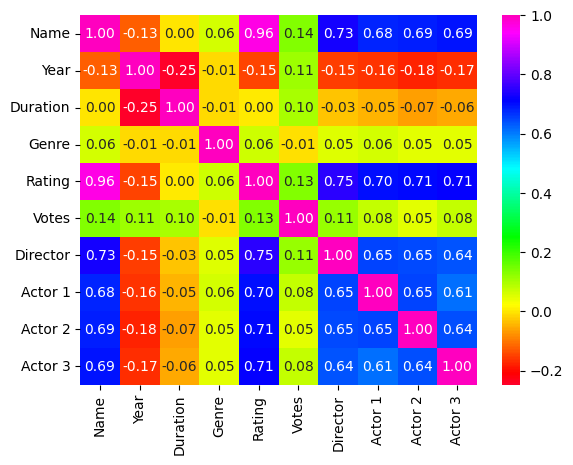

In [49]:
# CORRELATION
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='gist_rainbow')
plt.show()


In [50]:
# DROPPING DURATION AS IT IS NOT SIGNIFICANT
data.drop("Duration",axis=1,inplace=True)


In [51]:
features=data.drop("Rating",axis=1)


In [52]:
# SPLITTING DATA INTO TRAINING AND TESTING DATA
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)


In [53]:
x_train.shape


(7759, 8)

In [54]:
x_test.shape


(3326, 8)

In [55]:
# MODEL TRAINING
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [56]:
# PERFORMANCE EVALUATION
# MEAN SQUARED ERROR
mse=mean_squared_error(pred,y_test)
round(mse,2)


np.float64(0.09)

In [57]:
# R SQUARED VALUE
score=r2_score(pred,y_test)
round(score,2)


0.93

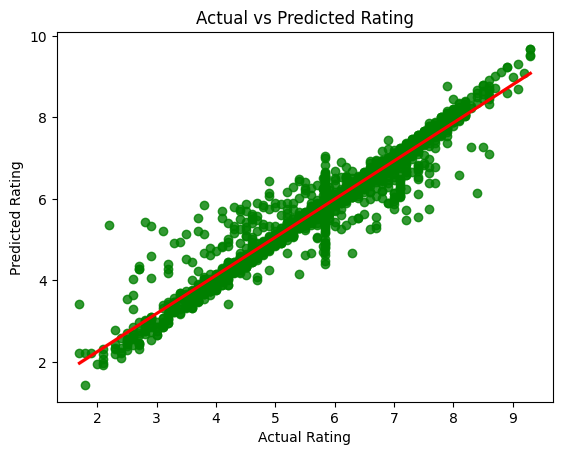

In [58]:
sns.regplot(x=y_test, y=pred, line_kws=dict(color="r"), scatter_kws=dict(color="green"))
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()


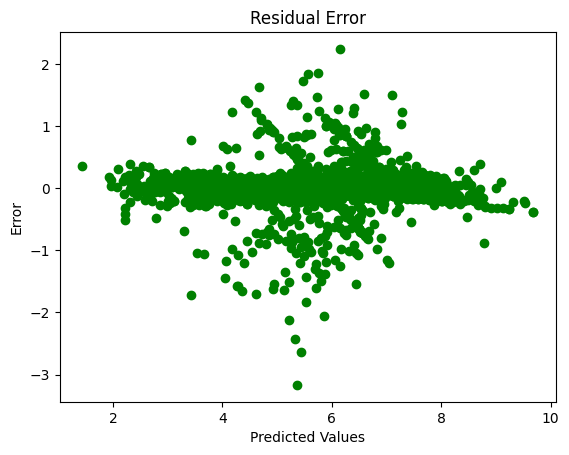

In [59]:
residual = y_test - pred
plt.scatter(x=pred, y=residual, c="green")
plt.xlabel("Predicted Values")
plt.ylabel("Error")
plt.title("Residual Error")
plt.show()


In [61]:
import joblib

# Save the model to a file
joblib.dump(model, "prediction_model/movie_rating_model.sav")
joblib.dump(mse, "prediction_model/mean_squared_error.sav")
joblib.dump(score, "prediction_model/r_square_value.sav")


['prediction_model/r_square_value.sav']